In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
crates = ['1C', '2C', '4C', '6C', '8C', 'C2']
print(crates)
parnames = ["as_2","as_4", 
            "Rp_2", "Rp_4",
            "epse_2", "epse_3", "epse_4", 
            "epss_2", "epss_4", 
            "k0_2", "k0_4", 
            "De_2", "De_3", "De_4", 
            "brug", "cse_2", "cse_4", "ce_2"]
parnames_tex = ["$a_{s,ne}$","$a_{s,pe}$", 
                "$R_{p,ne}$", "$R_{p,pe}$",
                "$\epsilon_{e,ne}$", "$\epsilon_{e,sep}$", "$\epsilon_{e,pe}$", 
                "$\epsilon_{s,ne}$", "$\epsilon_{s,pe}$", 
                "$k_{ne}$", "$k_{pe}$", 
                "$D_{e,ne}$", "$D_{e,sep}$", "$D_{e,pe}$", 
                "$brugg$", "$c_{se,ne}^0$", "$c_{se,pe}^0$", "$c_e^0$"]

['1C', '2C', '4C', '6C', '8C', 'C2']


In [5]:
dat = pd.read_csv(...)
dat

,C2,1C,2C,4C,6C,8C
0,0.144391,0.113331,0.131813,0.037458,0.006218,0.004505
1,0.180787,0.184857,0.143692,0.016573,0.040632,0.039634
2,0.139973,0.117634,0.129935,0.069319,0.013120,0.003353
3,0.171636,0.190697,0.150162,0.027776,0.054927,0.010614
4,0.021936,0.002895,0.001011,0.082709,0.046127,0.041969
5,0.006554,0.001706,0.000481,0.019165,0.021473,0.027199
6,0.016379,0.025427,0.017078,0.137948,0.148058,0.156562
7,0.000957,0.002097,0.000049,0.004029,0.001729,0.001936
8,0.006642,0.000856,0.000081,0.006251,0.002588,0.001243
9,0.003392,0.000720,0.000266,0.005653,0.007207,0.006104


In [6]:
dat_melt = dat.melt(var_name='C-rate', value_name='vpsi')
dat_melt['param'] = parnames*len(crates)
dat_melt

,C-rate,vpsi,param
0,C2,0.144391,as_2
1,C2,0.180787,as_4
2,C2,0.139973,Rp_2
3,C2,0.171636,Rp_4
4,C2,0.021936,epse_2
...,...,...,...
103,8C,0.000896,De_4
104,8C,0.245120,brug
105,8C,0.005879,cse_2
106,8C,0.405866,cse_4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


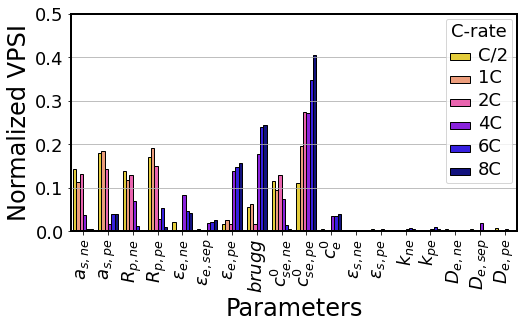

In [7]:
plt.rc('axes', linewidth=2)

par_order = [0,1,2,3,4,5,6, 14,15,16,17, 7,8,9,10,11,12,13]

plt.figure(figsize=(8,4))
plt.grid(axis='y')
ax = sns.barplot(x='param', y='vpsi',
                 data=dat_melt,
                 hue='C-rate',
                 palette='gnuplot2_r',
                 edgecolor='k',
                 linewidth=1,
                 order=np.array(parnames)[par_order])
plt.xlabel('Parameters', fontsize=24)
plt.xticks(range(len(parnames)), np.array(parnames_tex)[par_order], fontsize=18, rotation=90)
plt.ylabel('Normalized VPSI', fontsize=24)
plt.yticks(fontsize=18)
plt.ylim([0, 0.5])

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['C/2', *crates[:-1]], title='C-rate')

plt.setp(ax.get_legend().get_texts(), fontsize=18)
plt.setp(ax.get_legend().get_title(), fontsize=18)

# Save and Show
figure_name = ...
plt.savefig(f'{figure_name}.eps', bbox_inches='tight', dpi=300)
plt.show()